## Notebook for plotting learning curve for IE dataset (for Chemprop)

### Random splitting

**Created on 18th March, 2022**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import requests
#from selenium import webdriver
import os, sys
import json
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from rdkit import Chem
import rdkit.Chem.rdMolDescriptors as MolDescriptors
import rdkit.Chem.Descriptors as Descriptors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
%%bash
pwd
ls -ltr

/Users/riteshkumar/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/redox-stability/10-16-22/random-split/learning-curve
total 112
-rw-r--r--@ 1 riteshkumar  staff  917505 Mar 15 05:08 final_MP_red4.csv
-rw-------@ 1 riteshkumar  staff   14995 Mar 15 05:31 split_dataset.ipynb
drwxr-xr-x  7 riteshkumar  staff     224 Mar 18 12:31 r-0.3
drwxr-xr-x  7 riteshkumar  staff     224 Mar 18 12:32 r-0.4
drwxr-xr-x  7 riteshkumar  staff     224 Mar 18 12:37 r-0.5
drwxr-xr-x  7 riteshkumar  staff     224 Mar 18 12:38 r-0.6
drwxr-xr-x  7 riteshkumar  staff     224 Mar 18 12:38 r-0.7
drwxr-xr-x  7 riteshkumar  staff     224 Mar 18 12:38 r-0.8
drwxr-xr-x  7 riteshkumar  staff     224 Mar 18 18:57 r-0.2
-rw-r--r--  1 riteshkumar  staff      18 Mar 18 19:24 tt.txt
-rw-r--r--  1 riteshkumar  staff      63 Mar 18 19:30 test_r2.txt
-rw-r--r--@ 1 riteshkumar  staff   24887 Mar 18 22:42 learning_curve.eps
-rw-------@ 1 riteshkumar  staff   53415 May 23 06:07 plot_learning_curve.ipynb


In [97]:
%%bash
open .

In [3]:
df = pd.read_csv('final_MP_red4.csv')
df

,smiles,IE,EA
0,C(C#CC(C)C)(C)C,5.481535,-0.771096
1,C(=O)=O,9.433272,0.941193
2,O,7.902121,-1.343401
3,C(=C\C)/C(C)C,5.085723,-1.005246
4,c1(c(ccc(c1)C)C)C,4.733493,-0.843508
...,...,...,...
18128,c1cc(c2c(c1)[nH]sn2N(=O)=O)C(=O)O,3.220508,3.856206
18129,CC(=O)c1ccc2c(c1C#N)[nH]s[nH]2,3.620069,1.502602
18130,CCn1c2ccc(cc2[nH]s1)Cl,3.308856,2.027702
18131,CCc1ccc2c(c1O)[nH]s[nH]2,3.476727,2.415027


In [4]:
%%bash
r2_1=`grep "Overall test IE r2" r-0.2/quiet.log | awk '{printf"%6.4f\n",$6}'`

In [24]:
# import subprocess
# process = subprocess.run(['grep', 'Overall test IE r2', 'r-0.2/quiet.log'])
# # output, error = process.communicate()

	Overall test IE r2 = 0.963656 +/- 0.000726


In [5]:
for i in range(2,9):
    j = i/10
    # print(j)
    command = "grep 'Overall test IE r2' r-{}/quiet.log | awk '{{print $6}}' >> test_r2.txt".format(j)
    print(command)
    # command = "grep 'Overall test IE r2' r-{}/quiet.log | awk '{print $6}' >> test_r2.txt".format(j)
    # command = "grep 'Overall test IE r2' r-{}/quiet.log >> test_r2.txt".format(j)
    # command2 = "grep 'Overall test IE r2' r-0.3/quiet.log | awk '{print $6\n}' >> tt.txt"
    os.system(command)

grep 'Overall test IE r2' r-0.2/quiet.log | awk '{print $6}' >> test_r2.txt
grep 'Overall test IE r2' r-0.3/quiet.log | awk '{print $6}' >> test_r2.txt
grep 'Overall test IE r2' r-0.4/quiet.log | awk '{print $6}' >> test_r2.txt
grep 'Overall test IE r2' r-0.5/quiet.log | awk '{print $6}' >> test_r2.txt
grep 'Overall test IE r2' r-0.6/quiet.log | awk '{print $6}' >> test_r2.txt
grep 'Overall test IE r2' r-0.7/quiet.log | awk '{print $6}' >> test_r2.txt
grep 'Overall test IE r2' r-0.8/quiet.log | awk '{print $6}' >> test_r2.txt


In [6]:
%%bash
cat test_r2.txt

0.963656
0.958191
0.953733
0.951909
0.945741
0.933862
0.912736
0.963656
0.958191
0.953733
0.951909
0.945741
0.933862
0.912736


In [7]:
def get_r2():
    r2 = []
    with open('test_r2.txt', 'r') as f:
        for line in f:
            r2.append(float(line))
    return r2

test_r2 = get_r2()

In [8]:
def calc_train_r2(path):
    pred_file = path + '/deploy/preds_train.csv'
    true_file = path + '/train_random.csv'
    df_train = pd.read_csv(true_file)
    df_pred_train = pd.read_csv(pred_file)
    y_train = df_train['IE']
    y_pred_train = df_pred_train['IE']
    r2_train = r2_score(y_train, y_pred_train)
    return r2_train

train_r2 = []
for i in range(2,9):
    j = i/10
    path = 'r-{}'.format(j)
    r2_train = calc_train_r2(path)
    print(r2_train)
    train_r2.append(r2_train)

0.9943041479705822
0.9938956971507328
0.9938282401783728
0.992270455701314
0.9937385896864251
0.993217361957619
0.9913675121222203


In [9]:
# train_r2.reverse() ## reversing the list from 0.8 to 0.2
# test_r2.reverse() ## reversing the list from 0.8 to 0.2
# train_r2.append(0.9939976677637509)  ## appending for test_ratio = 0.1
# test_r2.append(0.9679225101973425) ## appending for test_ratio = 0.1
train_r2 = [0.9939976677637509] + train_r2 ## appending for test_ratio = 0.1
test_r2 = [0.9679225101973425] + test_r2 ## appending for test_ratio = 0.1
train_r2

[0.9939976677637509,
 0.9943041479705822,
 0.9938956971507328,
 0.9938282401783728,
 0.992270455701314,
 0.9937385896864251,
 0.993217361957619,
 0.9913675121222203]

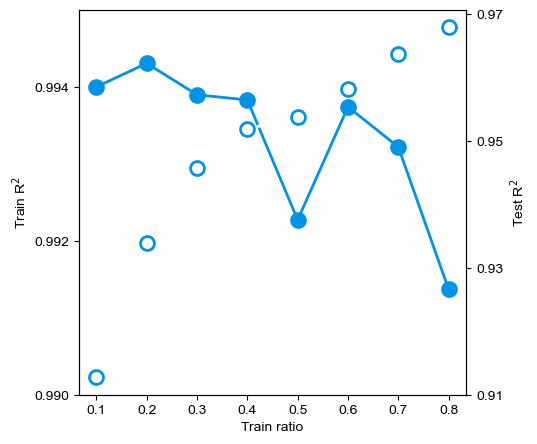

In [22]:
test_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
train_ratios = [1 - (0.1+x) for x in test_ratios]
plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(test_ratios, train_r2, label='train', marker='o', color=(0, 0.576, 0.902), linewidth=2, markersize=10, markeredgecolor=(0, 0.576, 0.902), markeredgewidth=2)
ax.set_ylim(0.990, 0.995)
ax.set_yticks([0.990, 0.992, 0.994])
ax.set_ylabel('Train R$^2$')
ax.set_xlabel('Train ratio')
ax2 = ax.twinx()
# ax2.plot(test_ratios, test_r2, label='test', marker='o', color=(0, 0.576, 0.902), linewidth=2, markersize=10, markerfacecolor='none')
# ax2.plot(test_ratios, test_r2, label='test', marker='o', color='w', linewidth=2, markersize=10, markeredgecolor=(0, 0.576, 0.902), markeredgewidth=2) ## in terms of test_ratio
ax2.plot(train_ratios, test_r2, label='test', marker='o', color='w', linewidth=2, markersize=10, markeredgecolor=(0, 0.576, 0.902), markeredgewidth=2) ## in terms of train_ratio; added on 23rd May, 2023
ax2.set_ylabel('Test R$^2$')
ax2.set_yticks([0.910, 0.930, 0.950, 0.970])
# ax.set_aspect(100)
# ax2.set_aspect(7.5)
plt.savefig('learning_curve_052323.eps', dpi=300)